# Human connectivity embedding

In [2]:
# Load affinitity matrix
aff = np.load('gradient_data/conn_matrices/cosine_affinity.npy')

In [ ]:
import sys
sys.path.append("../topography/utils_py/mapalign")
from mapalign import embed

emb, res = embed.compute_diffusion_map(aff, alpha = 0.5)

In [ ]:
# Save results
np.save('gradient_data/embedded/embedding_dense_emb.npy', emb)
np.save('gradient_data/embedded/embedding_dense_res.npy', res)

In [1]:
import numpy as np
res = np.load('gradient_data/embedded/embedding_dense_res.npy').item()
a = [res['vectors'][:,i]/ res['vectors'][:,0] for i in range(302)]
emb = np.array(a)[1:,:].T
len(emb)

91282

## Export to cifti space

In [2]:
import nibabel as nib
import numpy as np

In [3]:
res = nib.load('gradient_data/templates/hcp.tmp.lh.dscalar.nii').data
cortL = np.squeeze(np.array(np.where(res != 0)[0], dtype=np.int32))
res = nib.load('gradient_data/templates/hcp.tmp.rh.dscalar.nii').data
cortR = np.squeeze(np.array(np.where(res != 0)[0], dtype=np.int32))
cortLen = len(cortL) + len(cortR)
del res
# save out cortR and cortL in gradient_data/templates/


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [4]:
emb = np.load('gradient_data/embedded/embedding_dense_emb.npy')

In [5]:
tmp = nib.nifti2.load('gradient_data/templates/100307_tfMRI_MOTOR_level2_hp200_s2.dscalar.nii')
tmp_cifti = nib.cifti.load('gradient_data/templates/100307_tfMRI_MOTOR_level2_hp200_s2.dscalar.nii')
data = tmp_cifti.data * 0
data[0:10,:len(emb)] = np.reshape(emb.T, [1, 1, 1, 1] + list(emb.T.shape))
tmp2 = nib.nifti2.Nifti2Image(data, tmp.get_affine())
tmp4 = nib.nifti2.create_cifti_image(tmp2, tmp_cifti.header.to_xml(), np.array(3006, dtype=np.int32))
tmp4.to_filename('gradient_data/embedded/ciftis/hcp.embed.dscalar.nii')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


# Macaque connectivity embedding

In [2]:
pwd

u'/home/hpc3230/Code/libraries_of_mine/github/gradient_analysis'

In [3]:
sys.path.append('/home/hpc3230/Code/libraries_of_others/github/mapalign')

In [5]:
import sys
#sys.path.append("../topography/utils_py/mapalign")
from mapalign import embed
    
"""
def embed_macaque(mat_name):
    
    aff = np.load('gradient_data/conn_matrices/macaque_%s_conn.npy' % mat_name)
    print np.shape(aff)
    emb, res = embed.compute_diffusion_map(aff, alpha = 0.5)
    np.save('gradient_data/conn_matrices/macaque_%s_emb.npy' % mat_name, emb)
    np.save('gradient_data/conn_matrices/macaque_%s_res.npy' % mat_name, res)
""";

In [23]:
pwd

u'/home/hpc3230/Code/libraries_of_mine/github/gradient_analysis'

In [8]:
import numpy as np

In [9]:
f = 'gradient_data/conn_matrices/macaque_bb47_conn.npy'

In [10]:
aff = np.load(f)

In [39]:
embed.compute_diffusion_map??

In [32]:
emb,res = embed.compute_diffusion_map(aff,alpha=0.5,return_result=True)

In [33]:
emb.shape

(25, 2)

In [34]:
res.keys()

['n_components_auto', 'diffusion_time', 'vectors', 'n_components', 'lambdas']

In [38]:
res['n_components']

2

In [18]:
res.shape

(25, 2)

In [7]:
embed_macaque('bb47')

(25, 25)


In [19]:
aff.shape

(25, 25)

In [20]:
%matplotlib inline

In [21]:
import seaborn as sns

/home/hpc3230/Software/anaconda2/envs/tvb/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


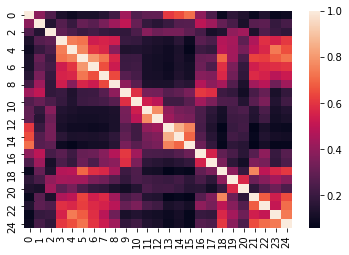

In [22]:
sns.heatmap(aff)

In [25]:
embed??

In [28]:
aff.shape

(25, 25)

In [27]:
res.shape

(25, 2)

In [29]:
embed.compute_diffusion_map??